### Problem
The number of shoes sold by an e-commerce company during the first three months(12 weeks) of the year were:
<br>
23 21 19 24 35 17 18 24 33 27 21 23

Meanwhile, the company developed some dynamic price optimization algorithms and the sales for the next 12 weeks were:
<br>
31 28 19 24 32 27 16 41 23 32 29 33

Did the dynamic price optimization algorithm deliver superior results? Can it be trusted?

### Solution

Before we get onto different approaches, let's quickly get a feel for the data



In [1]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#Load the data
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
before_opt.mean()

23.75

In [4]:
after_opt.mean()

27.916666666666668

In [5]:
observed_difference = after_opt.mean() - before_opt.mean()

In [6]:
print ("Difference between the means is:", observed_difference)

Difference between the means is: 4.166666666666668


On average, the sales after optimization is more than the sales before optimization. But is the difference legit? Could it be due to chance?

**Classical Method** : We could cover this method later on. This entails doing a *t-test* 
A t-test is an analysis of two populations means through the use of statistical examination; a t-test with two samples is commonly used with small sample sizes, testing the difference between the samples when the variances of two normal distributions are not known.

**Hacker's Method** : Let's see if we can provide a hacker's perspective to this problem, similar to what we did in the previous notebook.

In [7]:
#Step 1: Create the dataset. Let's give Label 0 to before_opt and Label 1 to after_opt

In [8]:
#Learn about the following three functions

In [9]:
?np.append

In [10]:
?np.zeros

In [ ]:
?np.ones

In [11]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)

In [13]:
print ("Shape:", shoe_sales.shape)
print ("Data:", "\n", shoe_sales)

Shape: (2, 24)
Data: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1]
 [23 21 19 24 35 17 18 24 33 27 21 23 31 28 19 24 32 27 16 41 23 32 29 33]]


In [16]:
#this will produce two lines of data side by side as above but in a column
shoe_sales = shoe_sales.T
print ("Shape:",shoe_sales.shape)
print ("Data:", "\n", shoe_sales)

Shape: (24, 2)
Data: 
 [[ 0 23]
 [ 0 21]
 [ 0 19]
 [ 0 24]
 [ 0 35]
 [ 0 17]
 [ 0 18]
 [ 0 24]
 [ 0 33]
 [ 0 27]
 [ 0 21]
 [ 0 23]
 [ 1 31]
 [ 1 28]
 [ 1 19]
 [ 1 24]
 [ 1 32]
 [ 1 27]
 [ 1 16]
 [ 1 41]
 [ 1 23]
 [ 1 32]
 [ 1 29]
 [ 1 33]]


In [10]:
#This is the approach we are going to take
#We are going to randomly shuffle the labels. Then compute the mean between the two groups. 
#Find the % of times when the difference between the means computed is greater than what we observed above
#If the % of times is less than 5%, we would make the call that the improvements are real

In [17]:
np.random.shuffle(shoe_sales)

In [18]:
shoe_sales

array([[ 1, 29],
       [ 1, 31],
       [ 1, 24],
       [ 0, 17],
       [ 1, 33],
       [ 1, 28],
       [ 0, 24],
       [ 0, 27],
       [ 1, 32],
       [ 0, 19],
       [ 0, 35],
       [ 1, 19],
       [ 1, 41],
       [ 1, 23],
       [ 0, 21],
       [ 0, 24],
       [ 0, 21],
       [ 1, 16],
       [ 0, 33],
       [ 0, 23],
       [ 1, 32],
       [ 0, 18],
       [ 0, 23],
       [ 1, 27]])

In [20]:
experiment_label = np.random.randint(0,2,shoe_sales.shape[0])

In [21]:
experiment_label

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1])

In [23]:
experiment_data = np.array([experiment_label, shoe_sales[:,1]])
experiment_data = experiment_data.T
print (experiment_data)

[[ 0 29]
 [ 1 31]
 [ 1 24]
 [ 1 17]
 [ 1 33]
 [ 1 28]
 [ 1 24]
 [ 0 27]
 [ 0 32]
 [ 0 19]
 [ 1 35]
 [ 0 19]
 [ 0 41]
 [ 0 23]
 [ 0 21]
 [ 0 24]
 [ 0 21]
 [ 1 16]
 [ 1 33]
 [ 0 23]
 [ 0 32]
 [ 0 18]
 [ 1 23]
 [ 1 27]]


In [24]:
experiment_diff_mean =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()

In [25]:
experiment_diff_mean

1.0734265734265733

In [26]:
#Like the previous notebook, let's repeat this experiment 100 and then 100000 times

In [27]:
def shuffle_experiment(number_of_times):
    experiment_diff_mean = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        experiment_label = np.random.randint(0,2,shoe_sales.shape[0])
        experiment_data = np.array([experiment_label, shoe_sales[:,1]]).T
        experiment_diff_mean[times] =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()
    return experiment_diff_mean    

In [28]:
experiment_diff_mean = shuffle_experiment(100)

In [29]:
experiment_diff_mean[:10]

array([[-1.60084034],
       [-1.24285714],
       [ 0.09440559],
       [ 2.24825175],
       [-1.75263158],
       [-0.04285714],
       [ 1.08333333],
       [-0.12857143],
       [ 1.01748252],
       [-1.08041958]])

/srv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


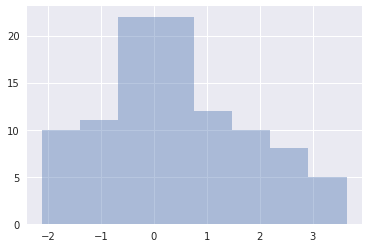

In [30]:
sns.distplot(experiment_diff_mean, kde=False)

In [31]:
#Finding % of times difference of means is greater than observed
print ("Data: Difference in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference])

print ("Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0])
print ("% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100)

Data: Difference in mean greater than observed: []
Number of times diff in mean greater than observed: 0
% of times diff in mean greater than observed: 0.0


#### Exercise: Repeat the above for 100,000 runs and report the results

# Is the result by chance? 

### What is the justification for shuffling the labels? 

>Thought process is this: If price optimization had no real effect, then, the sales before optimization would often give more sales than sales after optimization. By shuffling, we are simulating the situation where that happens -  sales before optimization is greater than sales after optimization. If many such trials provide improvements, then, the price optimization has no effect. In statistical terms, *the observed difference could have occurred by chance*. 

Now, to show that the same difference in mean might lead to a different conclusion, let's try the same experiment with a different dataset. 

In [32]:
before_opt = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt = np.array([310, 180, 190, 240, 220, 240, 160, 410, 130, 320, 290, 210])

In [33]:
print ("Mean sales before price optimization:", np.mean(before_opt))
print ("Mean sales after price optimization:", np.mean(after_opt))
print ("Difference in mean sales:", np.mean(after_opt) - np.mean(before_opt)) #Same as above

Mean sales before price optimization: 237.5
Mean sales after price optimization: 241.66666666666666
Difference in mean sales: 4.166666666666657


In [34]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)
shoe_sales = shoe_sales.T

/srv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


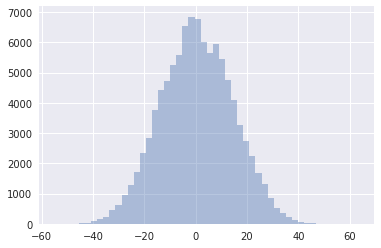

In [35]:
experiment_diff_mean = shuffle_experiment(100000)
sns.distplot(experiment_diff_mean, kde=False)

In [36]:
#Finding % of times difference of means is greater than observed
print("Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0])
print ("% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100)

Number of times diff in mean greater than observed: 40373
% of times diff in mean greater than observed: 40.373


### Did the conclusion change now? 

# Effect Size

> **Because you can't argue with all the fools in the world. It's easier to let them have their way, then trick them when they're not paying attention**  - Christopher Paolini

In the first case, how much did the price optimization increase the sales on average?

In [37]:
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

print ("The % increase of sales in the first case:", \
(np.mean(after_opt) - np.mean(before_opt))/np.mean(before_opt)*100,"%")

The % increase of sales in the first case: 17.543859649122812 %


In [38]:
before_opt = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt = np.array([310, 180, 190, 240, 220, 240, 160, 410, 130, 320, 290, 210])

print ("The % increase of sales in the second case:", \
(np.mean(after_opt) - np.mean(before_opt))/np.mean(before_opt)*100,"%")

The % increase of sales in the second case: 1.7543859649122768 %


**Would business feel comfortable spending millions of dollars if the increase is going to be just 1.75%. Does it make sense? Maybe yes - if margins are thin and any increase is considered good. But if the returns from the price optimization module does not let the company break even, it makes no sense to take that path.**

> Someone tells you the result is statistically significant. The first question you should ask?

# How large is the effect?

To answer such a question, we will make use of the concept **confidence interval**

In plain english, *confidence interval* is the range of values the measurement metric is going to take. 

An example would be: 90% of the times, the increase in average sales (before and after price optimization) would be within the bucket `3.4 and 6.7` (These numbers are illustrative. We will derive those numbers below)

What is the *hacker's way* of doing it? We will do the following steps:

1. From actual sales data, we sample the data with repetition (separately for before and after) - sample size will be the same as the original
2. Find the differences between the mean of the two samples.
3. Repeat steps 1 and 2 , say 100,000 times.
4. Sort the differences. For getting 90% interval, take the 5% and 95% number. That range gives you the 90% confidence interval on the mean.
5. This process of generating the samples is called **bootstrapping**

In [39]:
#Load the data
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [40]:
#generate a uniform random sample
random_before_opt = np.random.choice(before_opt, size=before_opt.size, replace=True)

In [41]:
print ("Actual sample before optimization:", before_opt)
print ("Bootstrapped sample before optimization: ", random_before_opt)

Actual sample before optimization: [23 21 19 24 35 17 18 24 33 27 21 23]
Bootstrapped sample before optimization:  [17 17 23 24 24 19 27 24 33 35 24 21]


In [42]:
print ("Mean for actual sample:", np.mean(before_opt))
print ("Mean for bootstrapped sample:", np.mean(random_before_opt))

Mean for actual sample: 23.75
Mean for bootstrapped sample: 24.0


In [43]:
random_after_opt = np.random.choice(after_opt, size=after_opt.size, replace=True)
print ("Actual sample after optimization:", after_opt)
print ("Bootstrapped sample after optimization: ", random_after_opt)
print ("Mean for actual sample:", np.mean(after_opt))
print ("Mean for bootstrapped sample:", np.mean(random_after_opt))

Actual sample after optimization: [31 28 19 24 32 27 16 41 23 32 29 33]
Bootstrapped sample after optimization:  [27 16 32 29 24 24 33 16 29 16 41 19]
Mean for actual sample: 27.916666666666668
Mean for bootstrapped sample: 25.5


In [44]:
print ("Difference in means of actual samples:", np.mean(after_opt) - np.mean(before_opt))
print ("Difference in means of bootstrapped samples:", np.mean(random_after_opt) - np.mean(random_before_opt))

Difference in means of actual samples: 4.166666666666668
Difference in means of bootstrapped samples: 1.5


In [45]:
#Like always, we will repeat this experiment 100,000 times. 

def bootstrap_experiment(number_of_times):
    mean_difference = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        random_before_opt = np.random.choice(before_opt, size=before_opt.size, replace=True)
        random_after_opt = np.random.choice(after_opt, size=after_opt.size, replace=True)
        mean_difference[times] = np.mean(random_after_opt) - np.mean(random_before_opt)
    return mean_difference

/srv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


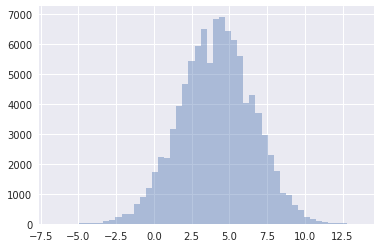

In [46]:
mean_difference = bootstrap_experiment(100000)
sns.distplot(mean_difference, kde=False)

In [47]:
mean_difference = np.sort(mean_difference, axis=0)

In [48]:
mean_difference #Sorted difference

array([[-6.58333333],
       [-5.91666667],
       [-5.83333333],
       ...,
       [13.41666667],
       [13.58333333],
       [13.58333333]])

In [49]:
np.percentile(mean_difference, [5,95])

array([0.16666667, 8.08333333])

Reiterating what this means: 90% of the times, the mean difference is between the limits as shown above

**Exercise: Find the 95% percentile for confidence intevals**

### Where do we go from here? 

First of all there are two points to be made.

1. Why do we need signficance testing if confidence intervals can provide us more information?
2. How does it relate to the traditional statistical procedure of finding confidence intervals

For the first one:

What if sales in the first month after price changes was 80 and the month before price changes was 40. The difference is 40. And confidence interval,as explained above, using replacements, would always generate 40. But if we do the significance testing, as detailed above - where the labels are shuffled, the prices are equally likely to occur in both the groups. And so, significance testing would answer that there was no difference. But don't we all know that the data is **too small** to make meaningful inferences?

For the second one:

Traditional statistics derivation assumes normal distribution. But what if the underlying distribution isn't normal? Also, people relate to resampling much better :-) 